Prima di tutto abilitiamo l'estensione autoreload di Jupyter

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Esercizio: Crescita Logistica

**Il modello di _crescita logistica_ definisce l'evoluzione di una singola popolazione**

...In particolare come la sua dimensione cambi nel tempo

* È definito dalla seguente ricorsione:

$$
x_{k+1} = r x_k \left( 1 - \frac{x_k}{N} \right)
$$

* Dove:
  - $x_k$ è il valore della popolazione al passo $k$
  - $r > 1$ è il tasso di crescita
  - $N$ è un valore di riferimento della popolazione

**Il modello consente di predire l'evoluzione di $x_k$ a partire da un valore iniziale $x_0$**

**Nel modulo `sol.logi.py`, si definisca la classe:**

```python
class Logi:
    def __init__(self, r, N=1):
        ...
    
    def __call__(self, x, k):
        ...
```

* Il costruttore riceve come ingresso il valore di `r` ed `N`
* Il metodo `__call__` deve calcolare il prossimo valore della popolazione
* Si noti che lo stato in questo caso è uno scalare
* ...Quindi non è necessario usare un array di `numpy`
* Si verifichi il funzionamento utilizzando il codice di collaudo fornito
* Il codice simula l'andamento della popolazione per diversi valori di $r$

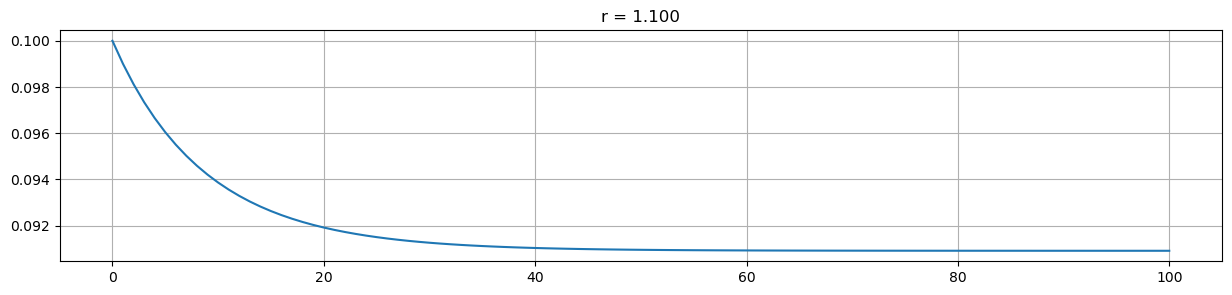

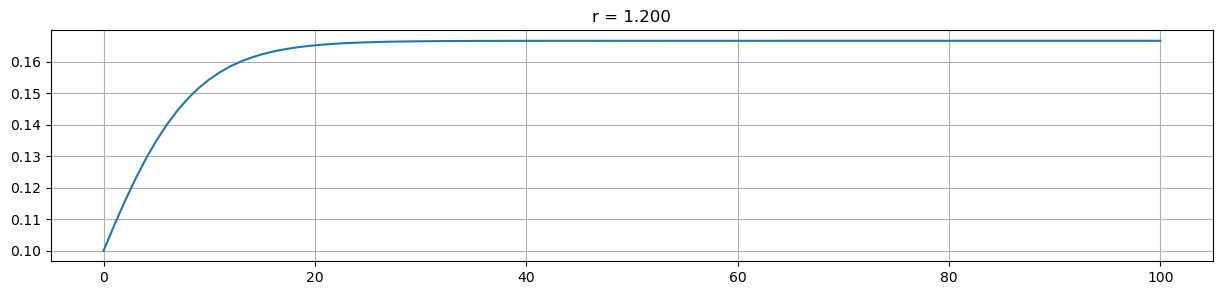

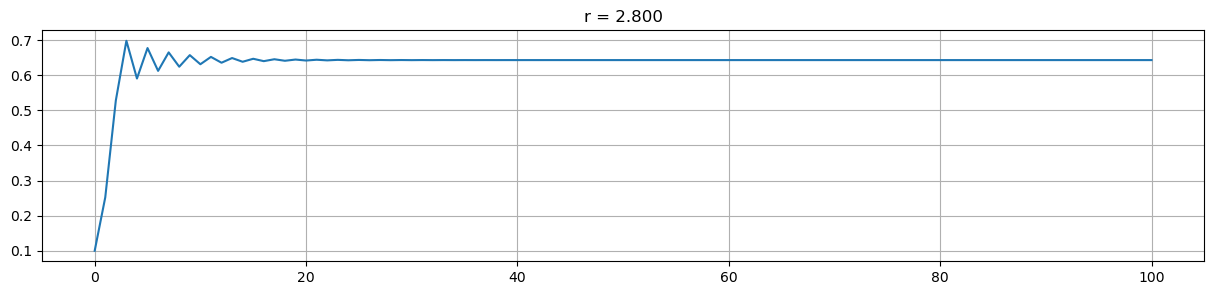

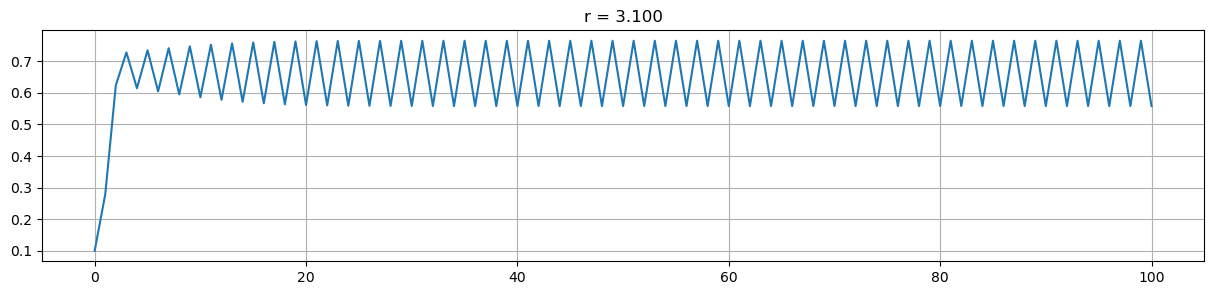

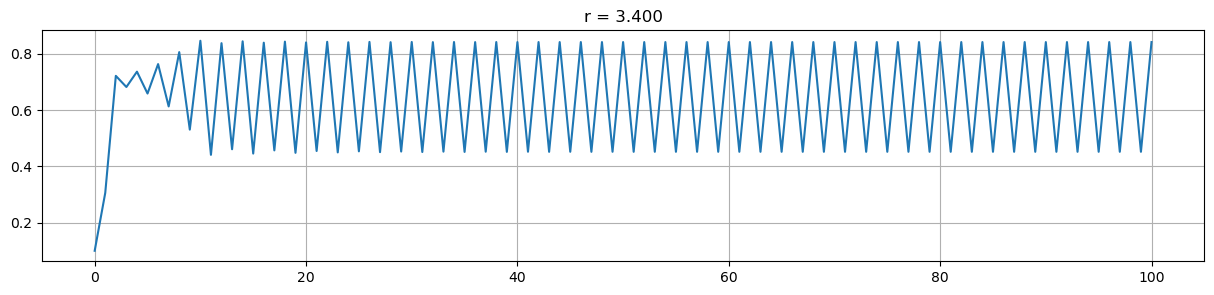

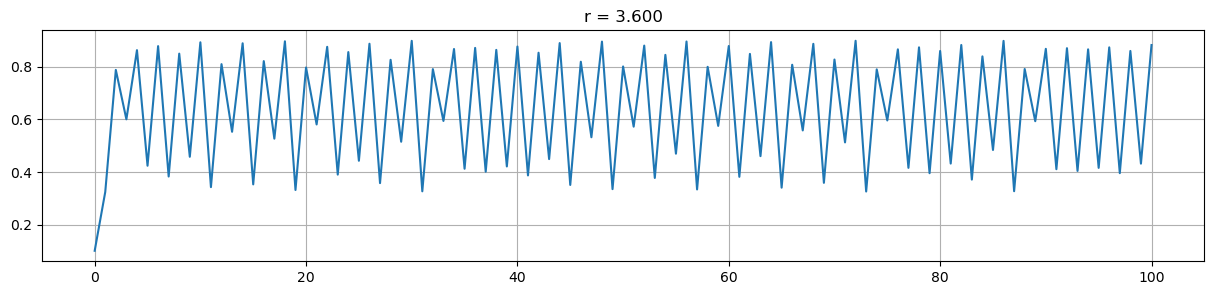

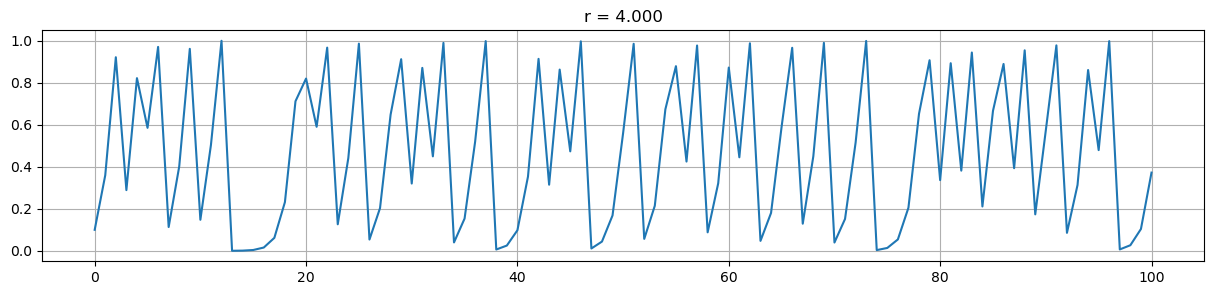

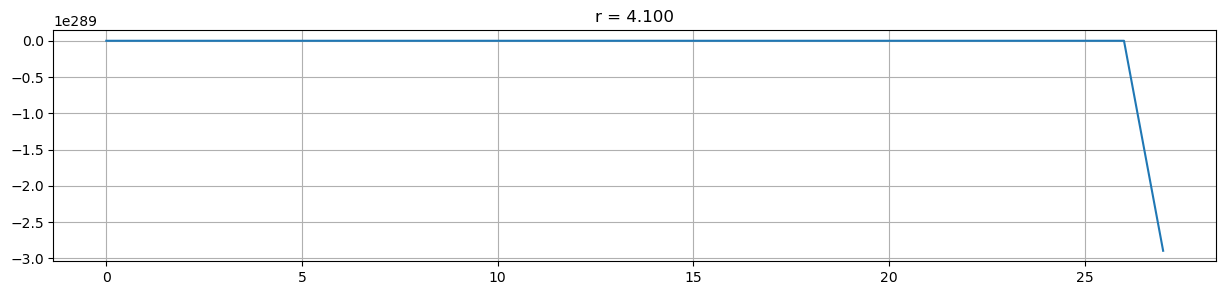

In [27]:
from sol import logi
from base import sim

x0 = 0.1 # valore iniziale della popolazione
n = 100 # numero di passi da simulate

for r in [1.1, 1.2, 2.8, 3.1, 3.4, 3.6, 4, 4.1]:
    f = logi.Logi(r=r) # costruisco la funzione di transizione
    X = sim.simulate(f, x0, 100) # simulo
    sim.plot_sim(X, title=f"r = {r:.3f}")

**Il modello appena visto è un esempio di _sistema dinamico tempo-discreto_**

* Questo perché descrive uno _stato_ che varia _nel tempo_
* ...Attraverso una seri di _passi discreti_

**Un sistema dinamico può avere cinque tipi di comportamento**

* Il sistema _converge_ ad uno _stato stabile_ (o di equilibrio)
* Il sistema _converge_ ma dopo alcune oscillazioni
* Il sistema _oscilla periodicamente_
* Il sistema varia continuamente, senza assumere un periodo: diventa _caotico_
* Il sistema _diverge_

**Il modello di crescita logistica può assumere tutti e 5 i comportamenti**

* Converge senza oscillazioni per per $r \in (1, 2]$
* Converge con oscillazioni per $r \in [2, 3]$
* È periodico per $r \in [3, 3.5)$
* È caotico per $r \in [3.5, 4]$
* Diverge per $r > 4$